In [1]:
import pandas as pd
import numpy as np
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from PIL import Image
from scipy import ndimage
import plotly.graph_objects as go
import os
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.math import confusion_matrix


In [2]:
train = pd.read_csv('mnist_train.csv', header=None)
test = pd.read_csv('mnist_test.csv', header=None)

In [3]:
print(f'traing data shape:{train.shape}')
print(f'test  data  shape:{test.shape}')

traing data shape:(60000, 785)
test  data  shape:(10000, 785)


## Explore the data

In [4]:
image_size = np.sqrt(train.shape[1]-1)
print(f'image size is {image_size} X {image_size}')

image size is 28.0 X 28.0


In [5]:
print(f'null values in train data: {train.isnull().sum().sum()}')
print(f'null values in test data: {test.isnull().sum().sum()}')

null values in train data: 0
null values in test data: 0


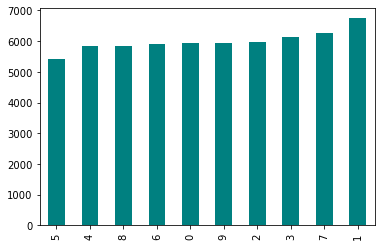

In [6]:
#plot the numbers count
values = train[0].value_counts(ascending=True)
values.plot.bar(color='teal');

## Split tha data

In [7]:
# since x_train and x_test contains pixel values ranging between 0 to 255 to it would be helpful scale it between 0 to 1 inclusive
scalar = MinMaxScaler(feature_range=(0, 1))

x_train = train.drop(0,axis=1).values
x_train = scalar.fit_transform(x_train)
y_train = train[0].values

x_test = test.drop(0,axis=1).values
x_test = scalar.fit_transform(x_test)
y_test = test[0].values

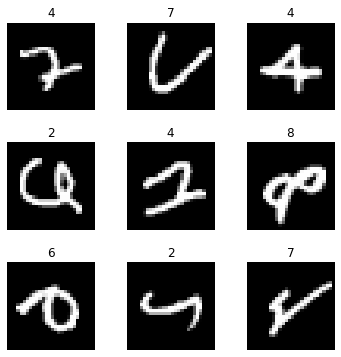

In [8]:
m, n = x_train.shape

fig, axes = plt.subplots(3,3, figsize=(5,5))
fig = fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train.reshape(60000,1)[random_index,0])
    ax.set_axis_off()

# Modeling

In [9]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),  

        Dense(128, activation='relu', name = 'layer1'),
        Dense(10, activation='sigmoid', name = 'layer2')
        
    ], name = 'Image_recognition'
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9293
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9678
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9778
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0565 - accuracy: 0.9827
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9936
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

## Evaluation

In [10]:
model.summary()

Model: "Image_recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
evaluation = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0922 - accuracy: 0.9800


In [12]:
print(f'Our model accuracy is {round(evaluation[1]*100,2)}%')

Our model accuracy is 98.0%


In [13]:
y_pred = model.predict(x_test)

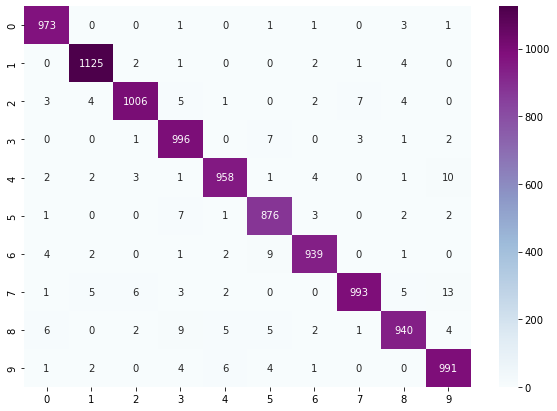

In [14]:
cf = tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(10,7))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');

In [15]:
def actual_vs_predicted(i):
    print("actual label ", y_test[i])
    print("predicted label ", np.argmax(y_pred[i]))
    plt.imshow(x_test[i].reshape(28,28))

actual label  4
predicted label  4


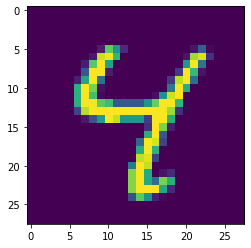

In [16]:
actual_vs_predicted(np.random.randint(y_test[0]))